In [1]:
from __future__ import division
from scipy import *
from pylab import *
from scipy.optimize import *
from tqdm import tqdm
import time
import os
from math import *

# Function definition

In [2]:
timestr = time.strftime("%Y-%m-%d-%H:%M:%S") # give the date and time that will be used to tag simulation results

def data_dir(dir="os.getcwd()"):   # will create the files needed to store values in CWD/Data
    directory = os.path.dirname(dir)
    if not os.path.exists('{}/{}'.format(os.getcwd(),'DiagramFsi')):
        os.makedirs('{}/{}'.format(os.getcwd(),'DiagramFsi'))
    if not os.path.exists('DiagramFsi/{}'.format(timestr)):
        os.makedirs('DiagramFsi/{}'.format(timestr))

In [3]:
def syst(var): # définition du système
    w, y = var[0], var[1] # définition des variables
    eq1 = y*sin(w*DeltaFSI) - w*((t1+t2+t3) - ((w**2)*t1*t2*t3))
    eq2 = y*cos(w*DeltaFSI) - ((w**2)*(t1*t2+t2*t3+t1*t3) - 1)
    res = [eq1, eq2]
    return res

# Parameters needed

In [4]:
## ====================================== MSNFSIGPe ===========================================
t1 =0.050   # time constant
t2 =0.005
t3 =0.005 

DeltaFSI = 0.0070 + 0.0010 + 0.0008 # delay

# Resolution process

In [6]:
w0, y0 = 200, 3 # Initialisation de la recherche des solutions numériques
sol_ini = [w0, y0]

lowlim=0
highlim=0.100
step=0.001

In [7]:
Dl=np.arange(lowlim,highlim,step)
wl=np.zeros(int(highlim/step))
fl=np.zeros(int(highlim/step))
Gl=np.zeros(int(highlim/step))

100%|██████████| 100/100 [00:00<00:00, 2908.21it/s]

[ 219.089023   24.2     ]
[ 185.08220159   17.27920557]
[ 162.9136514    13.65224641]
[ 146.74601892   11.39175831]
[ 134.19545478    9.83805641]
[ 124.05322543    8.69991937]
[ 115.62267635    7.82781933]
[ 108.46629731    7.13675276]
[ 102.2917874     6.57469188]
[ 96.89449972   6.10794738]
[ 92.12580028   5.71371222]
[ 87.87449926   5.37597881]
[ 84.05537111   5.08317058]
[ 80.60174853   4.82670146]
[ 77.46057186   4.6000644 ]
[ 74.58897893   4.39823497]
[ 71.95189465   4.21726966]
[ 69.52028871   4.05402844]
[ 67.26989129   3.90597886]
[ 65.18023      3.77105492]
[ 63.2338963    3.64755375]
[ 61.41597927   3.53405864]
[ 59.71362283   3.42938088]
[ 58.11567584   3.33251539]
[ 56.61241258   3.24260625]
[ 55.19530752   3.15891985]
[ 53.8568522    3.08082359]
[ 52.59040517   3.00776894]
[ 51.39006818   2.93927781]
[ 50.25058335   2.87493149]
[ 49.16724715   2.81436163]
[ 48.1358381    2.75724283]
[ 47.15255567   2.7032865 ]
[ 46.21396832   2.65223574]
[ 45.31696919   2.60386109]
[ 44.4

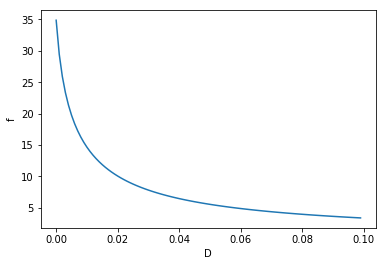

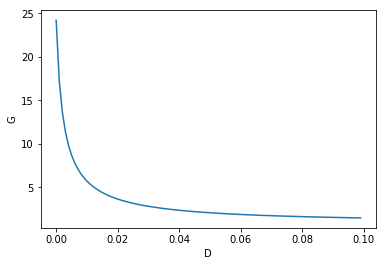

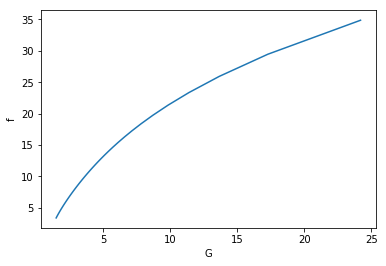

In [8]:
data_dir()

i=0
for DeltaFSI in tqdm(np.arange(lowlim,highlim,step)):
    sol=fsolve(syst, sol_ini)
    print(sol)

    sol2=sol[0]/(2*pi)
    
    wl[i]=sol[0]
    fl[i]=sol2
    Gl[i]=sol[1]
    
    i+=1
    sol_ini =[sol[0],y0]

plt.plot(Dl,fl)
plt.xlabel('D')
plt.ylabel('f')
plt.show()

plt.plot(Dl,Gl)
plt.xlabel('D')
plt.ylabel('G')
plt.show()

plt.plot(Gl,fl)
plt.xlabel('G')
plt.ylabel('f')
plt.show()

np.save('DiagramFsi/{}/{}_omega'.format(timestr,t1),wl)
np.save('DiagramFsi/{}/{}_frequency'.format(timestr,t1),fl)
np.save('DiagramFsi/{}/{}_weight'.format(timestr,t1),Gl)
np.save('DiagramFsi/{}/{}_delta'.format(timestr,t1),Dl)